[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/davemlz/eemont/blob/master/docs/tutorials/032-Combining-eemont-wxee.ipynb)

# Monthly Global kNDVI using eemont and wxee

_Tutorial created by **David Montero Loaiza**_: [GitHub](https://github.com/davemlz) | [Twitter](https://twitter.com/dmlmont)

- GitHub Repo: [https://github.com/davemlz/eemont](https://github.com/davemlz/eemont)
- PyPI link: [https://pypi.org/project/eemont/](https://pypi.org/project/eemont/)
- Conda-forge: [https://anaconda.org/conda-forge/eemont](https://anaconda.org/conda-forge/eemont)
- Documentation: [https://eemont.readthedocs.io/](https://eemont.readthedocs.io/)
- More tutorials: [https://github.com/davemlz/eemont/tree/master/docs/tutorials](https://github.com/davemlz/eemont/tree/master/docs/tutorials)

## Let's start!

If required, please uncomment:

In [1]:
#!pip install eemont
#!pip install wxee

Import the required packges.

In [2]:
import ee, eemont, wxee

Authenticate and Initialize Earth Engine.

In [3]:
ee.Initialize()

Use the force of `eemont` and `wxee` to get your data in an easy way!

In [4]:
MOD = ee.ImageCollection("MODIS/006/MCD43A4") \
    .filterDate("2021-01-01","2022-01-01") \
    .scaleAndOffset() \
    .spectralIndices("kNDVI") \
    .wx.to_time_series() \
    .aggregate_time(frequency="month",reducer=ee.Reducer.mean()) \
    .wx.to_xarray(region = ee.Geometry.BBox(-180, -90, 180, 90))

Requesting data: 100%|██████████| 12/12 [00:17<00:00,  1.44s/it]


Visualize everything!

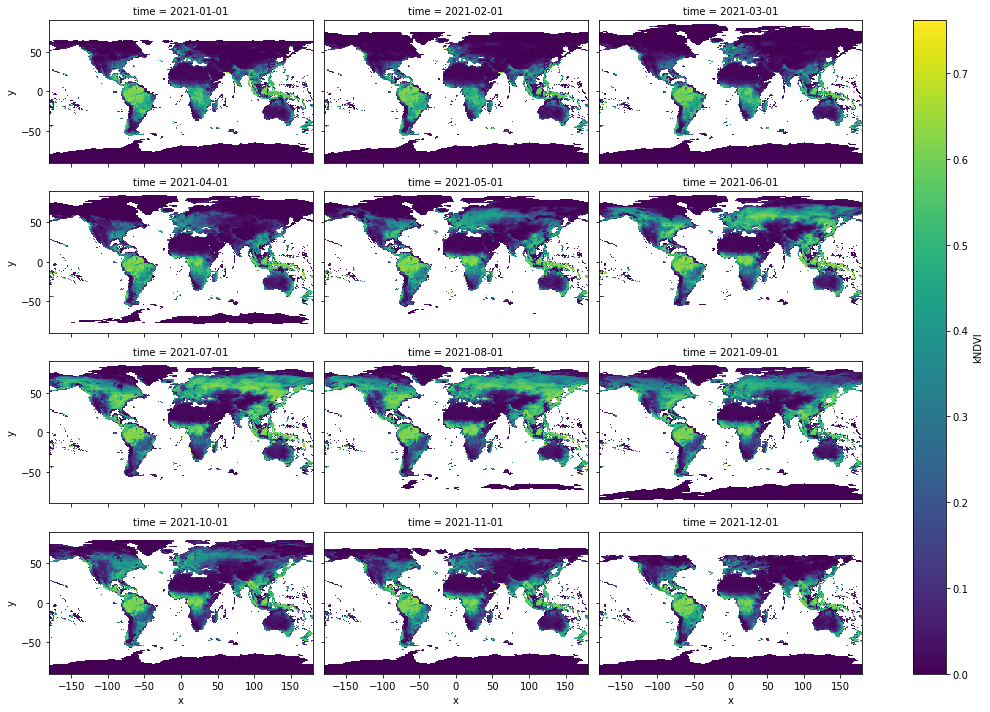

In [5]:
MOD.kNDVI.plot(col="time", col_wrap=3, cmap="viridis", figsize=(15, 10))